###**Understanding data**

 the goal is to build a sentiment analysis model for patients covid complain during their call with doctor, work with a data-set containing a collection of call transcript along with corresponding sentiment labels (emergency, non-emergency or follow up).
this model will accurately predict the sentiment of a given patients complains text.

###**import libraries**

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud

import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df= pd.read_excel("/content/Classified_Telehealth_COVID_Conversations.xlsx")

###**Exploring Data**



In [ ]:
df.head()

,Patient Complaint,Sentiment Analysis
0,i AM showing sym-ptoms OF high F:EVER ABOVE BE...,Emergency
1,i am suffering FROM H~IGH FEVER ABOVE 10'4°+F.,Emergency
2,"I AM"" r@eport#ing* OR HIGH FEVER! AB+OVE then ...",Emergency
3,i am experienc&ing severe RESPIRATORY dist=ress.,Emergency
4,I A|M SHOWING symp to?m@s of AN p'ersistent AL...,Emergency


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Patient Complaint   3999 non-null   object
 1   Sentiment Analysis  3999 non-null   object
dtypes: object(2)
memory usage: 62.6+ KB


In [ ]:
df['Sentiment Analysis'].value_counts()

Sentiment Analysis
Emergency        1333
Non-Emergency    1333
Follow-Up        1333
Name: count, dtype: int64

In [ ]:
df['Patient Complaint'].value_counts()

Patient Complaint
then i BECAUSE AM SHOWING SYMPTOMS\ OF REQ=UEST f+o%r TEST results].    1
i AM showing sym-ptoms OF high F:EVER ABOVE BECAUSE 104°%F.             1
i am suffering FROM H~IGH FEVER ABOVE 10'4°+F.                          1
I AM" r@eport#ing* OR HIGH FEVER! AB+OVE then 10<4°F(.                  1
i am experienc&ing severe RESPIRATORY dist=ress.                        1
                                                                       ..
i AM if SUFFERING? FROM BLUISH LIPS or FACE.                            1
i am repor(ting A in^tense che[st pa(in.                                1
then I but am suffer;ing FROM BLUISH li:ps o.r face.                    1
BUT I am\ A REPORTING AND INTENSE CHEST PAIN."                          1
i AM so suffering f"rom SEVERE if r-espiratory DISTRE]SS..              1
Name: count, Length: 3999, dtype: int64

In [ ]:
# prompt: remove duplicate

df = df.drop_duplicates(subset=['Patient Complaint'], keep='first')

In [ ]:
df.describe(include='all')

,Patient Complaint,Sentiment Analysis
count,3999,3999
unique,3999,3
top,then i BECAUSE AM SHOWING SYMPTOMS\ OF REQ=UES...,Emergency
freq,1,1333


<Axes: >

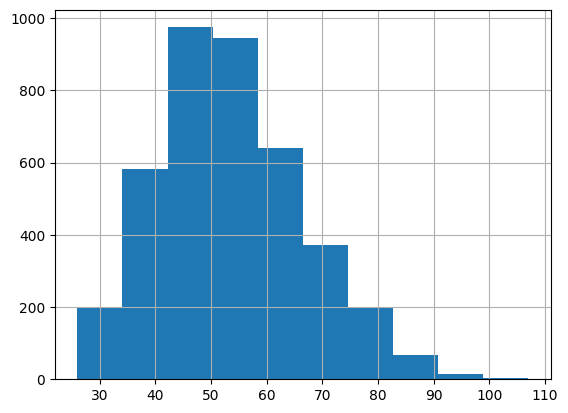

In [ ]:
#exploring number of characters
df['Patient Complaint'].str.len().hist()

The histogram shows that text range from 15 to 110 characters.

Now, we will move on the histogram for emergency complains, non-emergency complains and follow up complains respectively. Let's plot!

Text(0.5, 1.0, 'Follow-Up Patient Complaint')

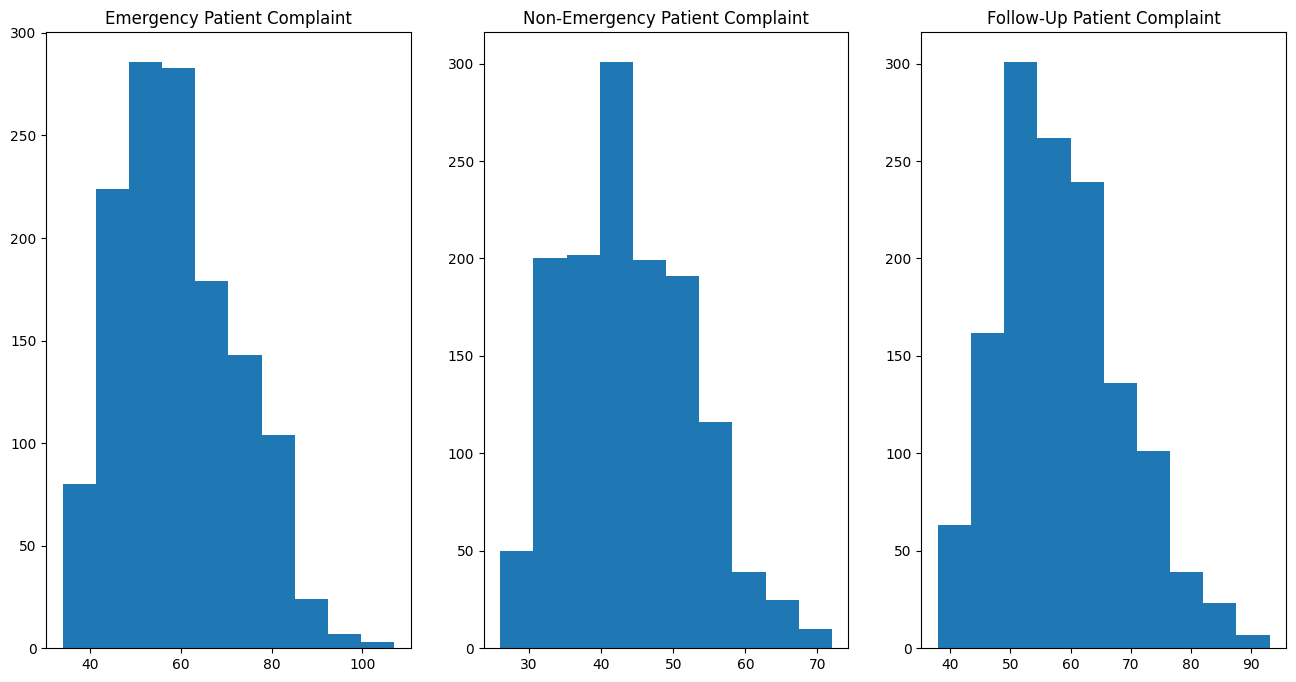

In [ ]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3, figsize=(16,8))
ax1.hist(df[df['Sentiment Analysis']=='Emergency']['Patient Complaint'].str.len())
ax1.set_title( 'Emergency Patient Complaint')
ax2.hist(df[df['Sentiment Analysis']=='Non-Emergency']['Patient Complaint'].str.len())
ax2.set_title( 'Non-Emergency Patient Complaint')
ax3.hist(df[df['Sentiment Analysis']=='Follow-Up']['Patient Complaint'].str.len())
ax3.set_title( 'Follow-Up Patient Complaint')

we can observe some insights from the graph above:

In general, people comment more words in the non-emergency complains than with emergency complains.
However the range of word for emergency complains are bigger than the range of non-emergency complains. It means in some cases, people give a long comments for emergency complains and people could less talk for non-emergency complains
Before we move on to the next section: data preprocessing to clean the text data, we will make a wordcloud graph to show the most used words in large font and the least used words in small font in emergency complains, non-emergency complains and follow-up

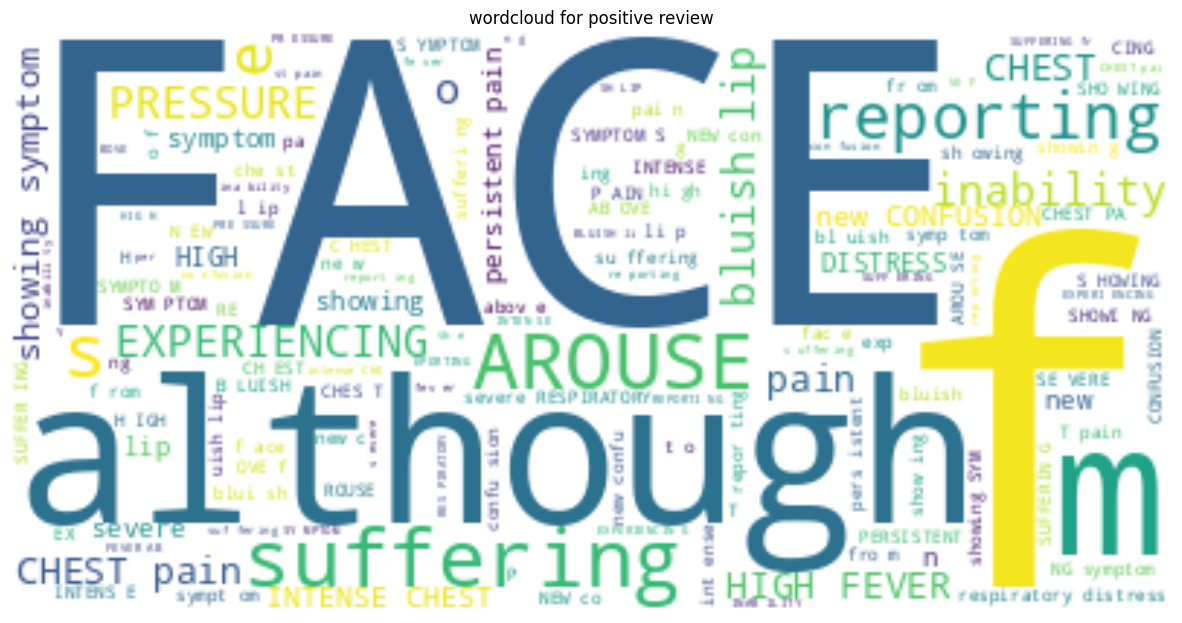

In [ ]:
text = " ".join(i for i in df[df['Sentiment Analysis']=='Emergency']['Patient Complaint'])
wordcloud = WordCloud( background_color="white").generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('wordcloud for positive review')
plt.show()

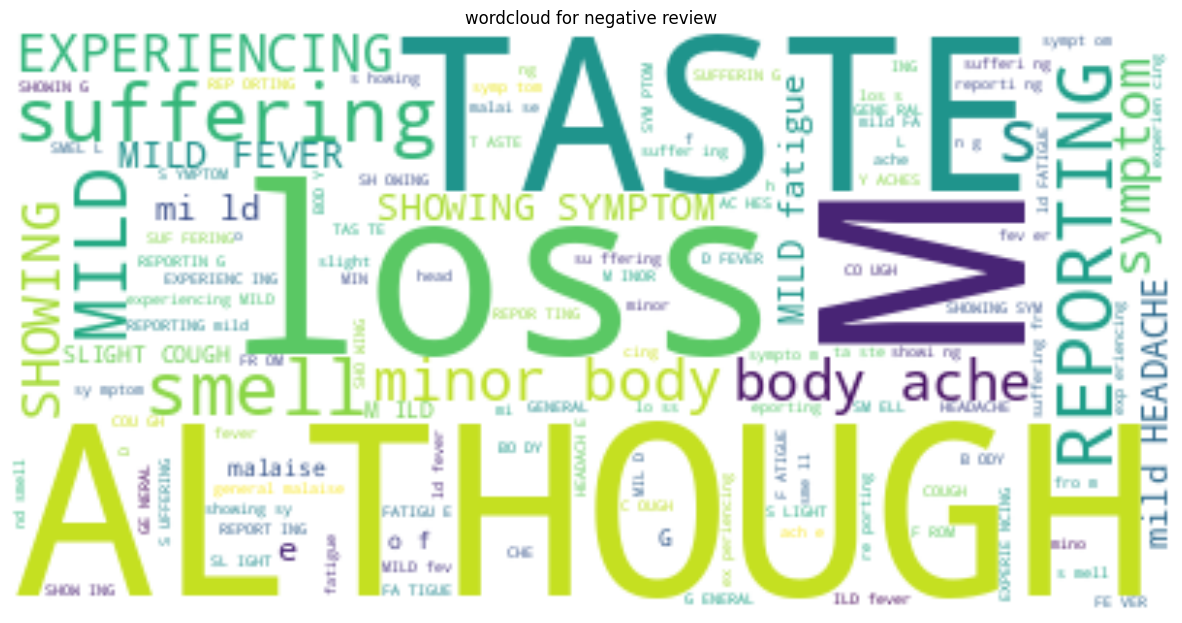

In [ ]:
text = " ".join(i for i in df[df['Sentiment Analysis']=='Non-Emergency']['Patient Complaint'])
#stopwords = set(STOPWORDS)
wordcloud = WordCloud( background_color="white").generate(text)
#wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('wordcloud for negative review')
plt.show()

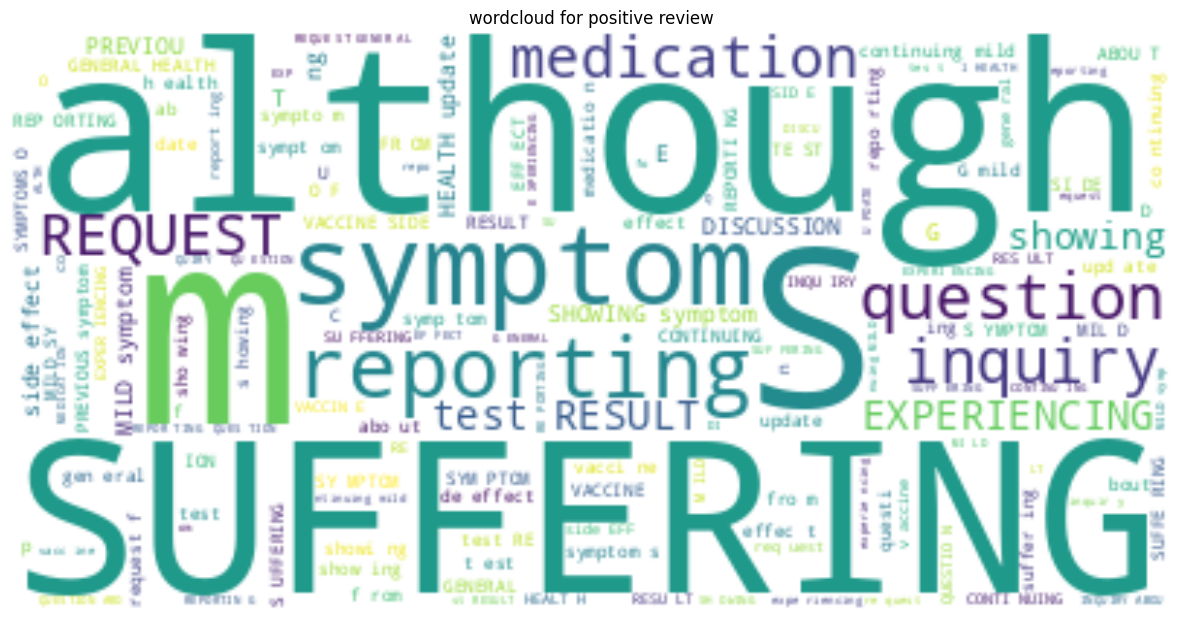

In [ ]:
text = " ".join(i for i in df[df['Sentiment Analysis']=='Follow-Up']['Patient Complaint'])
wordcloud = WordCloud( background_color="white").generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('wordcloud for positive review')
plt.show()

The wordcloud graphs in both negative and postitive comments don't show meaningful result.

In [ ]:
df['Patient Complaint'][0]

'i AM showing sym-ptoms OF high F:EVER ABOVE BECAUSE 104°%F.'

###**Preprocessing Data**
Preprocess the text data by removing stop-words, punctuation, special
characters, and converting text to lowercase.
Tokenize the text and apply techniques such as stemming or lemmatization to
normalize word forms.

In [ ]:
def cleaning(text):
    # converting to lowercase, removing URL links, special characters, punctuations...
    text = text.lower() # converting to lowercase
    text = re.sub('https?://\S+|www\.\S+', '', text) # removing URL links
    text = re.sub(r"\b\d+\b", "", text) # removing number
    text = re.sub('<.*?>+', '', text) # removing special characters,
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # punctuations
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)

    #removing emoji:
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

   # removing short form:

    text=re.sub("isn't",'is not',text)
    text=re.sub("isn't",'is not',text)
    text=re.sub("he's",'he is',text)
    text=re.sub("wasn't",'was not',text)
    text=re.sub("there's",'there is',text)
    text=re.sub("couldn't",'could not',text)
    text=re.sub("won't",'will not',text)
    text=re.sub("they're",'they are',text)
    text=re.sub("she's",'she is',text)
    text=re.sub("There's",'there is',text)
    text=re.sub("wouldn't",'would not',text)
    text=re.sub("haven't",'have not',text)
    text=re.sub("That's",'That is',text)
    text=re.sub("you've",'you have',text)
    text=re.sub("He's",'He is',text)
    text=re.sub("what's",'what is',text)
    text=re.sub("weren't",'were not',text)
    text=re.sub("we're",'we are',text)
    text=re.sub("hasn't",'has not',text)
    text=re.sub("you'd",'you would',text)
    text=re.sub("shouldn't",'should not',text)
    text=re.sub("let's",'let us',text)
    text=re.sub("they've",'they have',text)
    text=re.sub("You'll",'You will',text)
    text=re.sub("i'm",'i am',text)
    text=re.sub("we've",'we have',text)
    text=re.sub("it's",'it is',text)
    text=re.sub("don't",'do not',text)
    text=re.sub("that´s",'that is',text)
    text=re.sub("I´m",'I am',text)
    text=re.sub("it’s",'it is',text)
    text=re.sub("she´s",'she is',text)
    text=re.sub("he’s'",'he is',text)
    text=re.sub('I’m','I am',text)
    text=re.sub('I’d','I did',text)
    text=re.sub("he’s'",'he is',text)
    text=re.sub('there’s','there is',text)


    return text

df1 = df['Patient Complaint'].apply(cleaning)

In [ ]:
df1 = pd.DataFrame(df1)
df1['sentiment']=df['Sentiment Analysis']
df1

,Patient Complaint,sentiment
0,i am showing symptoms of high fever above beca...,Emergency
1,i am suffering from high fever above °f,Emergency
2,i am reporting or high fever above then °f,Emergency
3,i am experiencing severe respiratory distress,Emergency
4,i am showing symp toms of an persistent althou...,Emergency
...,...,...
3994,so i am reporting if continuing mild then symp...,Follow-Up
3995,i am suffering from inquiry about vaccine side...,Follow-Up
3996,i although am the reporting general health if ...,Follow-Up
3997,i am showing symptoms of inquiry an about vacc...,Follow-Up


In [ ]:
stop_words = stopwords.words()
#stopwords.words("english")

In [ ]:
df1['no_sw'] = df1['Patient Complaint'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [ ]:
#Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in df1["no_sw"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(20))
temp.columns=['word', 'count']
temp

,word,count
0,symptoms,1421
1,suffering,1003
2,showing,989
3,reporting,987
4,experiencing,924
5,mild,806
6,pain,446
7,chest,441
8,fever,419
9,general,406


In [ ]:
px.bar(temp, x="count", y="word", title='Commmon Words in Text', orientation='h',
             width=700, height=700)

In [ ]:
# Remove the most frequent words:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])
df1["wo_stopfreq"] = df1["no_sw"].apply(lambda text: remove_freqwords(text))
df1.head()

,Patient Complaint,sentiment,no_sw,wo_stopfreq
0,i am showing symptoms of high fever above beca...,Emergency,showing symptoms high fever °f,high °f
1,i am suffering from high fever above °f,Emergency,suffering high fever °f,high °f
2,i am reporting or high fever above then °f,Emergency,reporting high fever °f,high °f
3,i am experiencing severe respiratory distress,Emergency,experiencing severe respiratory distress,severe respiratory distress
4,i am showing symp toms of an persistent althou...,Emergency,showing symp toms persistent pain pressure chest,symp toms persistent pressure


In [ ]:
df1['no_sw'].loc[10]

'reporting confusion inability arouse'

In [ ]:
df1['wo_stopfreq'].loc[10]

'confusion inability arouse'

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Lemmatization:
wordnet_lem = WordNetLemmatizer()

df1['wo_stopfreq_lem'] = df1['wo_stopfreq'].apply(wordnet_lem.lemmatize)
df1

,Patient Complaint,sentiment,no_sw,wo_stopfreq,wo_stopfreq_lem
0,i am showing symptoms of high fever above beca...,Emergency,showing symptoms high fever °f,high °f,high °f
1,i am suffering from high fever above °f,Emergency,suffering high fever °f,high °f,high °f
2,i am reporting or high fever above then °f,Emergency,reporting high fever °f,high °f,high °f
3,i am experiencing severe respiratory distress,Emergency,experiencing severe respiratory distress,severe respiratory distress,severe respiratory distress
4,i am showing symp toms of an persistent althou...,Emergency,showing symp toms persistent pain pressure chest,symp toms persistent pressure,symp toms persistent pressure
...,...,...,...,...,...
3994,so i am reporting if continuing mild then symp...,Follow-Up,reporting continuing mild symptoms,continuing,continuing
3995,i am suffering from inquiry about vaccine side...,Follow-Up,suffering inquiry vaccine side effects,inquiry vaccine side effects,inquiry vaccine side effects
3996,i although am the reporting general health if ...,Follow-Up,reporting general health update,health update,health update
3997,i am showing symptoms of inquiry an about vacc...,Follow-Up,showing symptoms inquiry vaccine side effects,inquiry vaccine side effects,inquiry vaccine side effects


Now, the data is clean! we can move to the next step: Navie_Bayes Modelling!

###**Tokenization**

In [ ]:
# create the cleaned data for the train-test split:
nb=df1.drop(columns=['Patient Complaint','no_sw', 'wo_stopfreq'])
nb.columns=['sentiment','wo_stopfreq_lem']

nb['sentiment'] = [2 if sentiment == "Emergency" else 1 if sentiment == "Non-Emergency" else 0 for sentiment in nb['sentiment']]
nb

,sentiment,wo_stopfreq_lem
0,2,high °f
1,2,high °f
2,2,high °f
3,2,severe respiratory distress
4,2,symp toms persistent pressure
...,...,...
3994,0,continuing
3995,0,inquiry vaccine side effects
3996,0,health update
3997,0,inquiry vaccine side effects


In [ ]:
tokenized_review=nb['wo_stopfreq_lem'].apply(lambda x: x.split())
tokenized_review.head(5)

0                            [high, °f]
1                            [high, °f]
2                            [high, °f]
3       [severe, respiratory, distress]
4    [symp, toms, persistent, pressure]
Name: wo_stopfreq_lem, dtype: object

###**Feature Engineering:**
Convert the preprocessed text data into numerical representations suitable
for machine learning models.
Use techniques like bag-of-words (BoW) Representation:
We initialize a CountVectorizer object.
We fit and transform the corpus using the fit_transform() method of CountVectorizer.
This generates a sparse matrix where each row corresponds to a document in the corpus, and each column corresponds to a unique word in the corpus. The cell values represent the frequency of each word in the corresponding document.


term frequency-inverse document
frequency (TF-IDF), or word embed-dings (e.g., Word2Vec, GloVe) to
represent textual features.
Explore the use of n-grams and other text features to capture context and
semantics in the movie reviews.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(nb['wo_stopfreq_lem'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



###**Model Selection and Training:**
Choose appropriate machine learning algorithms for sentiment analysis,
such as naive Bayes.
Split the dataset into training and testing sets for model evaluation.
Train the selected models on the training data and fine-tune
hyperparameters if necessary.

In [ ]:
from sklearn.model_selection import train_test_split
X=text_counts
y=nb['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=30)

In [ ]:
cv = CountVectorizer()

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
MNB = MultinomialNB()
MNB.fit(X_train, y_train)

MultinomialNB()

###**Model Prediction**

In [ ]:
predicted = MNB.predict(X_test)

###**Model Evaluation**

Evaluate the performance of trained models using appropriate evaluation
metrics such as accuracy, precision, recall, F1-score, and receiver
operating characteristic (ROC) curve.
Compare the performance of different models and identify the bestperforming
model for sentiment analysis of patients complain.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
acc_score = accuracy_score(y_test, predicted)

In [ ]:
#accuracy_score = metrics.accuracy_score(predicted, y_test)

print('MultinominalNB model accuracy is',str('{:04.2f}'.format(acc_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

MultinominalNB model accuracy is 94.12%
------------------------------------------------
Confusion Matrix:
     0    1    2
0  272    0    0
1    1  240   43
2    0    3  241
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       272
           1       0.99      0.85      0.91       284
           2       0.85      0.99      0.91       244

    accuracy                           0.94       800
   macro avg       0.94      0.94      0.94       800
weighted avg       0.95      0.94      0.94       800



####**Trying different n-grams:**
a) Bigram: ngram_range = (2,2)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv_twograms = CountVectorizer(stop_words='english',ngram_range = (2,2),tokenizer = token.tokenize)
text_counts_twograms = cv_twograms.fit_transform(nb['wo_stopfreq_lem'])

X_train, X_test, y_train, y_test = train_test_split(text_counts_twograms, nb['sentiment'], test_size=0.20,random_state=30)

MNB = MultinomialNB()
MNB.fit(X_train, y_train)
predicted1 = MNB.predict(X_test)
accuracy_score1 = accuracy_score(predicted1, y_test)
print('model accuracy is',str('{:04.2f}'.format(accuracy_score1*100))+'%')

model accuracy is 74.25%


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



b) Trigram: ngram_range= (3,3)

In [ ]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv_threegrams = CountVectorizer(stop_words='english',ngram_range = (3,3),tokenizer = token.tokenize)
text_counts_threegrams = cv_threegrams.fit_transform(nb['wo_stopfreq_lem'])

X_train, X_test, y_train, y_test = train_test_split(text_counts_threegrams, nb['sentiment'], test_size=0.20,random_state=30)

MNB = MultinomialNB()
MNB.fit(X_train, y_train)
predicted2 = MNB.predict(X_test)
accuracy_score2 = accuracy_score(predicted2, y_test)
print('model accuracy is',str('{:04.2f}'.format(accuracy_score2*100))+'%')

model accuracy is 50.38%


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



TF-IDF: Term Frequency-Inverse Document Frequency

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
tfidf = TfidfVectorizer()

# Assume nb['wo_stopfreq_lem'] and nb['sentiment'] are defined
text_count_2 = tfidf.fit_transform(nb['wo_stopfreq_lem'])

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(text_count_2, nb['sentiment'], test_size=0.20, random_state=30)

# Fitting the model with Multinomial Naive Bayes (MNB)
MNB = MultinomialNB()
MNB.fit(x_train, y_train)

# Calculating accuracy
predicted3 = MNB.predict(x_test)
accuracy_score3 = accuracy_score(predicted3, y_test)

print(f'accuracy_score_mnb = {accuracy_score3*100:.2f}%')


accuracy_score_mnb = 94.12%


###**BERT Model**

In [ ]:
pip install transformers torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [ ]:
import torch
from torch.utils.data import DataLoader, RandomSampler, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW


# Load BERT tokenizer and BERT model for sequence classification with 3 labels
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Tokenize all of the sentences and map the tokens to their word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in nb['wo_stopfreq_lem']:
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )

    # Add the encoded sentence to the list.
    input_ids.append(encoded_dict['input_ids'])

    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(nb['sentiment'].values)

# Create the DataLoader.
dataset = TensorDataset(input_ids, attention_masks, labels)
dataloader = DataLoader(dataset, sampler=RandomSampler(dataset), batch_size=32)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2674: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



In [ ]:
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

# If there's a GPU available...
if torch.cuda.is_available():
    model.cuda()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:521: FutureWarning:

This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning



In [ ]:
epochs = 4
for epoch_i in range(0, epochs):
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    model.train()

    for step, batch in enumerate(dataloader):
        # Add batch to GPU
        batch = tuple(t.to('cuda') if torch.cuda.is_available() else t.to('cpu') for t in batch)

        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch

        # Clear any previously calculated gradients before performing a backward pass.
        model.zero_grad()

        # Perform a forward pass (evaluate the model on this training batch).
        outputs = model(b_input_ids, token_type_ids=None,
                        attention_mask=b_input_mask, labels=b_labels)

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end.
        loss = outputs.loss
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()

    print("Training complete!")


======== Epoch 1 / 4 ========
Training complete!
======== Epoch 2 / 4 ========
Training complete!
======== Epoch 3 / 4 ========
Training complete!
======== Epoch 4 / 4 ========
Training complete!


In [ ]:
tient

###**Model deployment and Integration:**
Deploy the trained sentiment analysis model into a functional system where
it can be used to classify patients complain in real-time.
Integrate the model into telehealth platforms to provide
users with sentiment analysis insights and recommendations.
Ensure the system's scalability, reliability, and security in handling large
volumes of user-generated content.

In [ ]:
import joblib

In [ ]:
joblib.dump(MNB, 'patients.pkl')

['patients.pkl']

In [ ]:
loaded= joblib.load('patients.pkl')

In [ ]:
# Sample text you want to classify
new_text = ['i have high fever, difficult breathing, blue lips']

# Transform the new text using the same TfidfVectorizer instance used for the training data
new_text_transformed = tfidf.transform(new_text)

# Use the trained model to predict
prediction = loaded.predict(new_text_transformed)

print(f'Prediction: {prediction}')


Prediction: [2]


###**Model Interpretation and Insights:**
Interpret the results of the trained model to understand which words or
phrases contribute most to positive or negative sentiment.
Visualize important features and analyze how they impact sentiment
predictions.
Provide insights into common themes, sentiments, and trends observed in
patients complain.